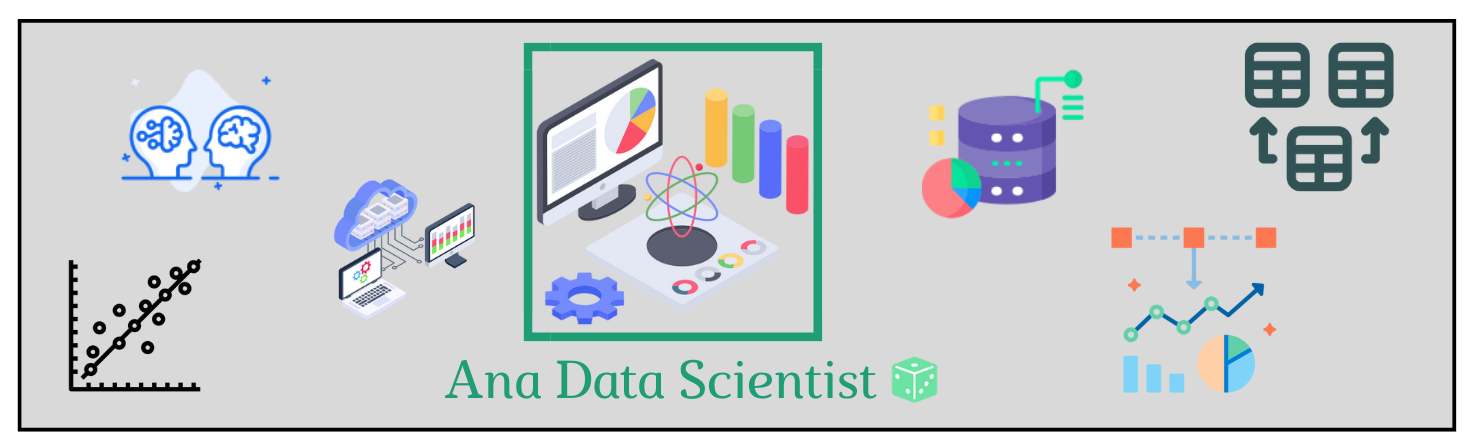

<h1 style="text-align: center; color: #1f9d76"> Projeto Previsão do Preço da Casa (House Price Prediction)</h1>

<div class="alert alert-block alert-info"><font size="3">
    <b> Project Description:</font><font size="3"></b> O objetivo desse projeto <strong>Previsão do Preço da Casas</strong> é prever o preço da casa baseada nas suas características. Os dados utilizados para o desenvolvimento desse projeto é da plataforma Kaggle (plataforma de competição). </font> 
</div>

<font size="5"><a id="sumario"><bold>Summary</bold></a></font>
***
>1. [Introdução ao Modelo](#ses1)
>2. [Importação das Bibliotecas](#ses2)
>3. [Carregando os Dados](#ses3)
>4. [Preparação dos Dados](#ses4)
>5. [Análise Exploratória](#ses5)
>6. [Normalização dos Dados](#ses6)
>7. [Encoding dos Dados](#ses7)
>8. [Modelo LGBM](#ses8)

<h1 style="text-align:center;" ><a id="ses1">Modelo LightGBM</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

LightGBM (Light Gradient Boosting Machine) é um modelo supervisionado com estrutura de aumento de gradiente baseada em árvore de decisão para aumentar a eficiência do modelo e reduzir o uso de memória. 


As características principais do LGBM são:

* Maior precisão e uma velocidade de treinamento mais rápida.

* Baixa utilização de memória

* Comparativamente melhor precisão do que outros algoritmos de impulsionamento e lida com o overfitting muito melhor ao trabalhar com conjuntos de dados menores.

* Suporte à Aprendizagem Paralela.

* Compatível com conjuntos de dados pequenos e grandes

Você pode ler a documentação original do LGBM [aqui](https://lightgbm.readthedocs.io/en/latest/index.html). 

<h1 style="text-align:center;" ><a id="ses2">Imports</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Section Description</h3> 

Importações das bibliotecas utilizadas para o desenvolvimento desse notebook e algumas configurações de saídas de códigos.

In [1]:
# Imports

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import warnings
import watermark
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgbm

In [2]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print("")

# Versões de pacotes utilizados 

%reload_ext watermark
%watermark -a "Ana Data Scientist" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.8

Author: Ana Data Scientist

numpy     : 1.22.4
seaborn   : 0.12.1
matplotlib: 3.6.2
sklearn   : 1.2.1
pandas    : 1.5.2
watermark : 2.3.1
missingno : 0.5.1
lightgbm  : 3.3.5



In [3]:
# Para ignorar mensagens de alertas 

warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

# Visualizar todas as colunas do dataset

pd.set_option('display.max_columns', None)

<h1 style="text-align:center;" ><a id="ses3">Carregamento dos dados</a></h1>

[VOLTAR](#sumario)

In [4]:
# Dataset de train

import os
os.chdir('C:\\Projetos\\House_Price_Predicition\\01-CodigoFonte\\00-DataSets')

price_house = pd.read_csv('train.csv')

# Dataset test

price_house_test = pd.read_csv('test.csv')

In [5]:
# Visualizando as primeiras linhas 

price_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1 style="text-align:center;" ><a id="ses4">Preparação dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é fazer as transformações necessárias e limpeza dos dados que serão usados para treinar o modelo, como por exemplo:
* tratar valores ausentes
* remover dados  duplicados
* corrigir formatos incorretos

Entre outras tranformações e limpezas que podem ser realizadas e assim garantindo gerar resultados mais precisos. 

In [6]:
# Dimensão dos dados

print(f'''
Dataset de treino: {price_house.shape[0]} linhas e {price_house.shape[1]} colunas.

Dataset de test: {price_house_test.shape[0]} linhas e {price_house_test.shape[1]} colunas.''')


Dataset de treino: 1460 linhas e 81 colunas.

Dataset de test: 1459 linhas e 80 colunas.


In [7]:
# Tipos dos dados

price_house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# Verificando se tem valores ausentes

price_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot: >

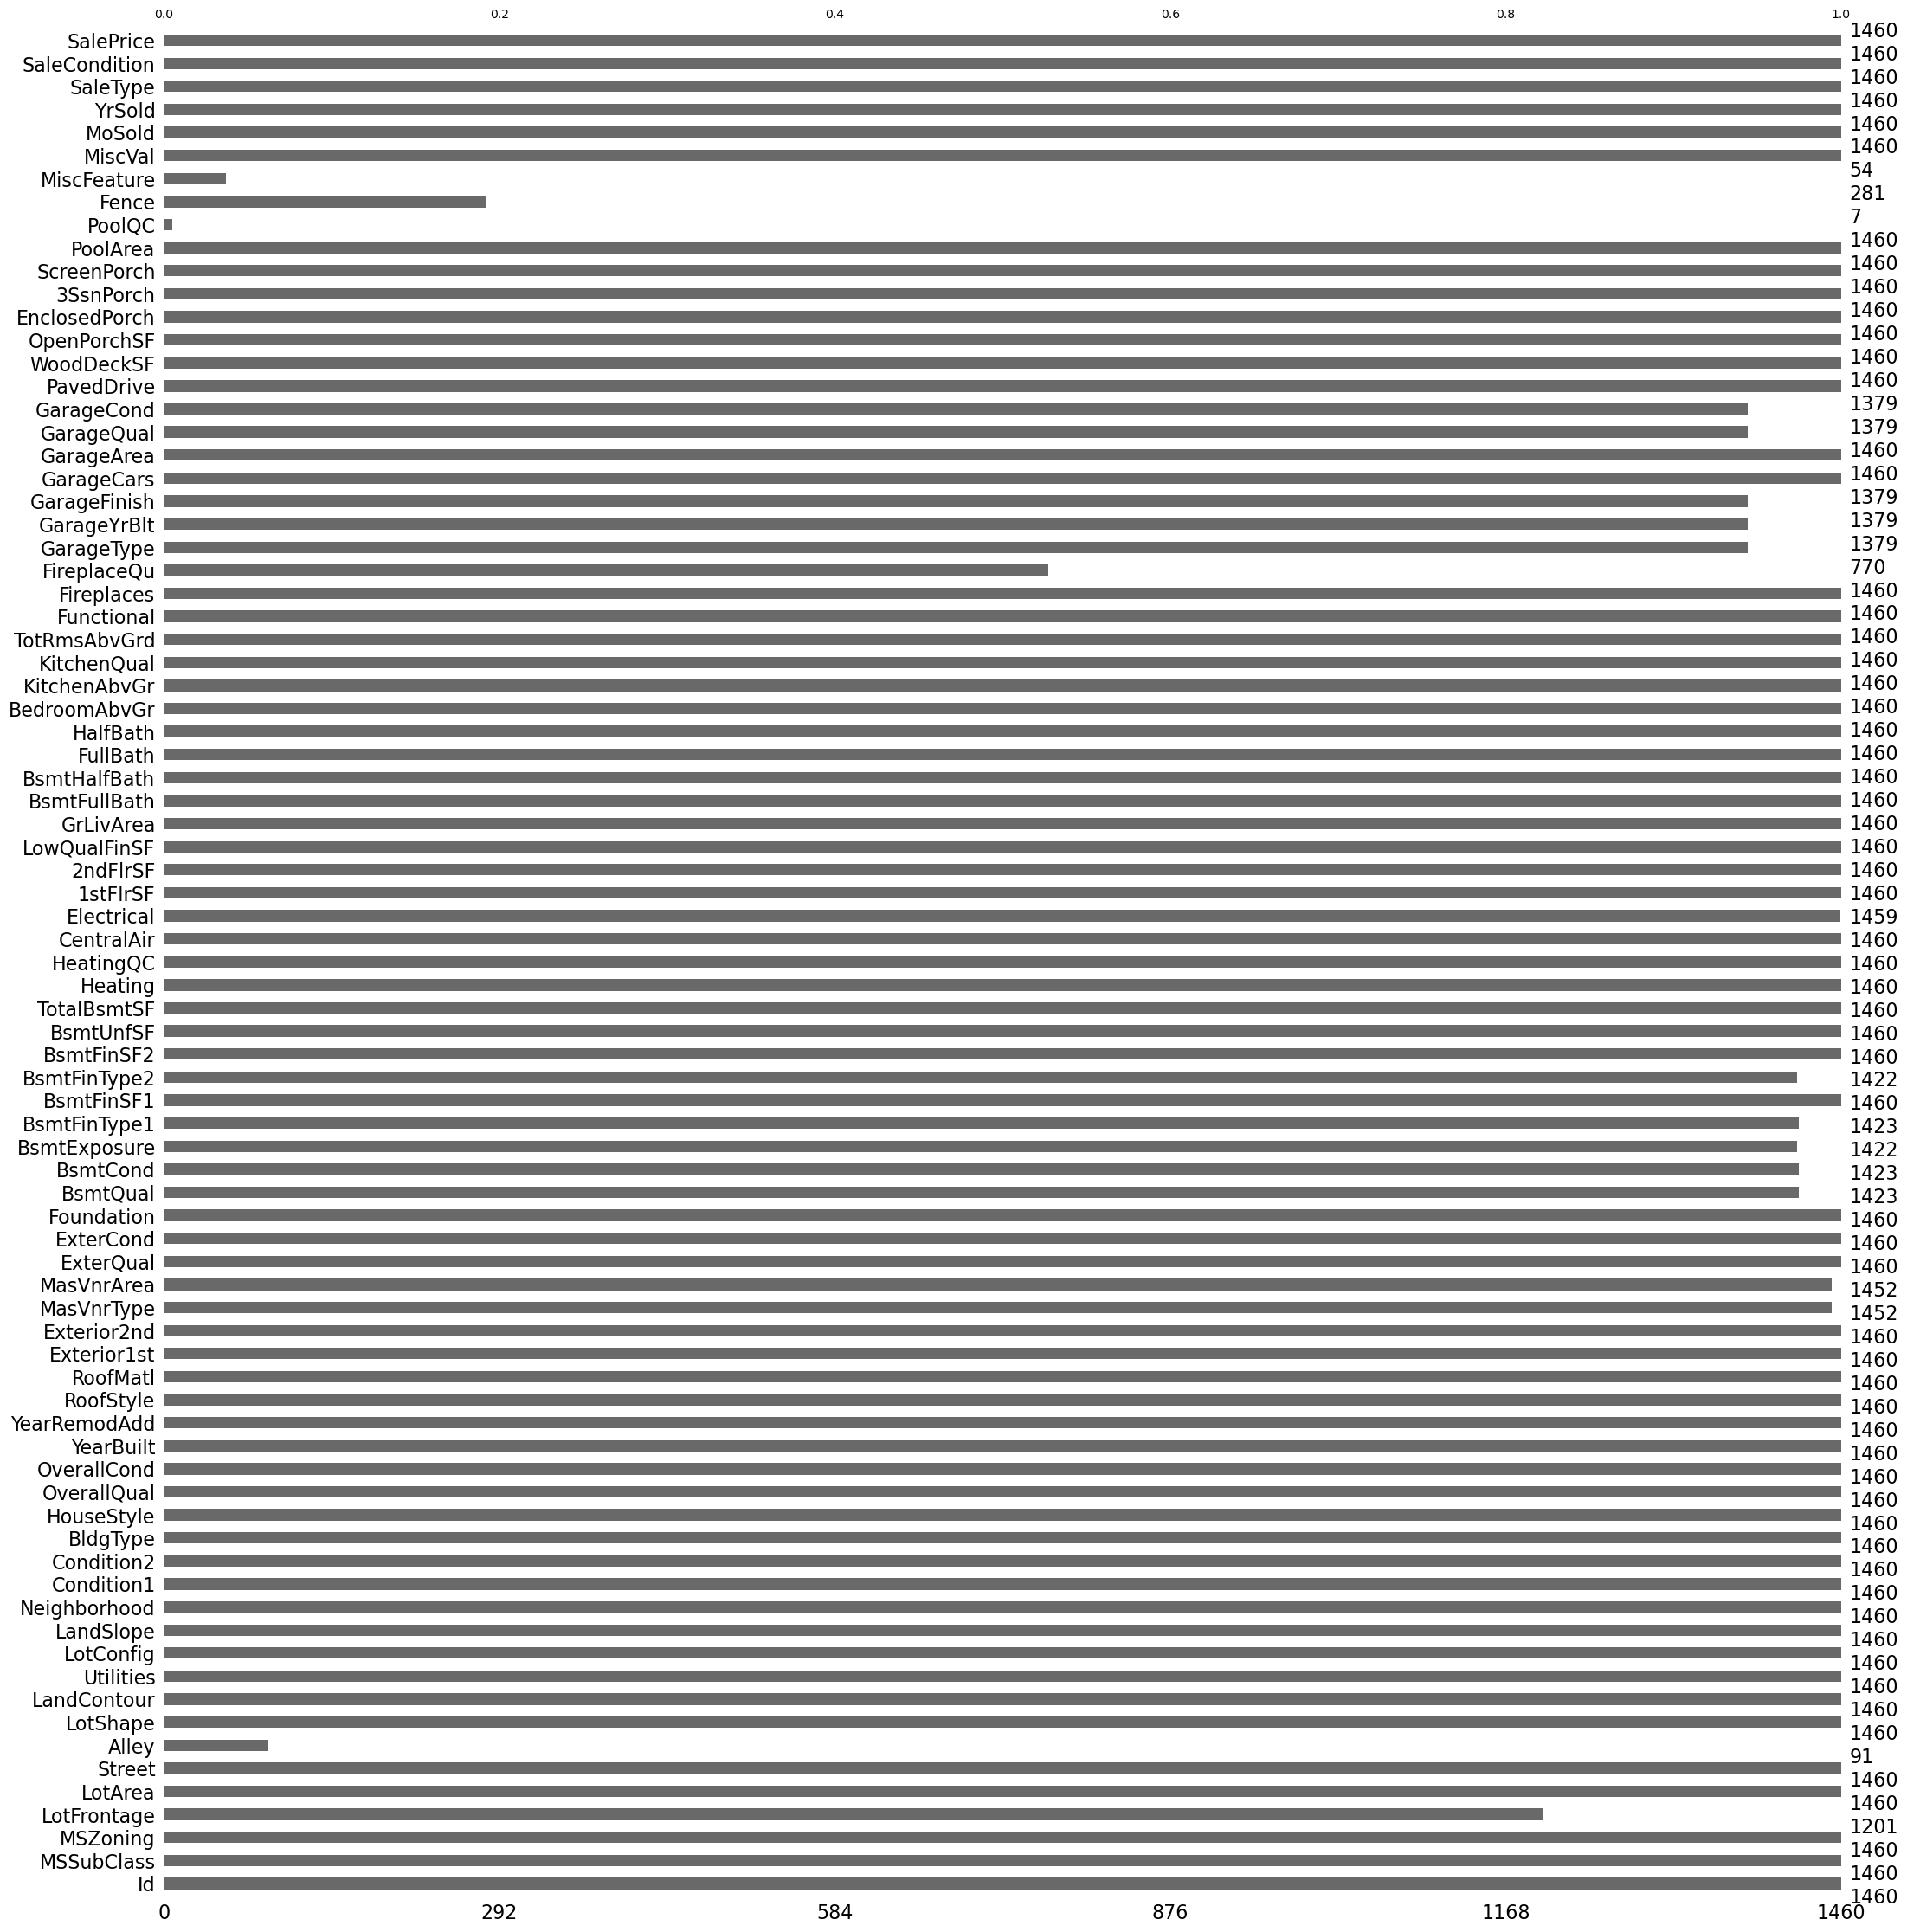

In [9]:
# Verificando se tem valores ausentes

msno.bar(price_house)

In [10]:
percent_missing = price_house.isnull().sum() * 100 / len(price_house)

missing_value_df = pd.DataFrame({'qtd_missing': price_house.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'column_type': price_house.dtypes}
                               ).reset_index().rename(columns={'index': 'column_name'})

# Filtrando as colunas que tem a porcentagem maior que 0 

missing_value_df[missing_value_df['percent_missing'] > 00.00]

,column_name,qtd_missing,percent_missing,column_type
3,LotFrontage,259,17.739726,float64
6,Alley,1369,93.767123,object
25,MasVnrType,8,0.547945,object
26,MasVnrArea,8,0.547945,float64
30,BsmtQual,37,2.534247,object
31,BsmtCond,37,2.534247,object
32,BsmtExposure,38,2.602740,object
33,BsmtFinType1,37,2.534247,object
35,BsmtFinType2,38,2.602740,object
42,Electrical,1,0.068493,object


<h3 style="color: #cca002"><strong>Observações sobre os valores missing:</strong></h3>

Pelas análises acima, percebemos que tem algumas colunas com valores missing muito alto e outras com valores missing insignificante.

Para essas *variáveis categóricas* pode ser feito o tratamento dos valores missings substituindo os NaNs para sua devidas descrição e para as *variáveis numéricas* pode ser feito a tratamento de de substituir os NaNs pelo valor mais frequente da coluna. 

<!-- Os tratamento só não vão ser aplicados nas colunas *SalePrice, train, test*, pois as colunas train e test foi criada para facilitar a separação depois e a coluna SalePrice tem valores missing devido a mesclagem dos datasets. -->

<span style="color: #cca002">**Obs:**</span> As descrição das colunas estão no arquivo [DictionaryData]("https://github.com/anamariapego/House_Price_Predicition/blob/main/02-Documentos_Refer%C3%AAncias/DictionaryData.ipynb") na pasta 02-Documentos_Referencias. 

In [11]:
# Fazendo os tratamentos dos valores missing das variáveis categóricas 

values = {'MasVnrType': 'None', 'BsmtQual':'No Basement', 'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement', 
          'BsmtFinType1': 'No Basement', 'BsmtFinType2': 'No Basement', 'FireplaceQu': 'No Fireplace', 
          'GarageType': 'No Garage','GarageYrBlt': 0, 'GarageFinish': 'No Garage', 'GarageQual': 'No Garage', 
          'GarageCond': 'No Garage',  'Alley': 'Without Access', 'PoolQC': 'No Pool', 'Fence': 'No Fence', 
          'MiscFeature': 'No Features'}

price_house.fillna(value=values, inplace = True)

In [12]:
# Fazendo os tratamentos dos valores missing das variáveis numéricas

imputer_number = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

# Selecionando as colunas numéricas 

column_number = price_house.select_dtypes(include=['int64', 'float64']).columns

price_house[column_number] = imputer_number.fit_transform(price_house[column_number])

In [13]:
# Verificando os valores missing após as tranformações

price_house[price_house.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380.0,80.0,RL,73.0,9735.0,Pave,Without Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5.0,5.0,2006.0,2007.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754.0,640.0,0.0,1394.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,No Fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100.0,0.0,0.0,0.0,0.0,0.0,No Pool,No Fence,No Features,0.0,5.0,2008.0,WD,Normal,167500.0


As colunas que tinha valores missing  com um percentual abaixo de 0% e com quantidade menor que 5 NaNs  não foram consideradas para passar pelas transformações, as linhas com esses valores serão excluídas.

In [14]:
# Removendo os valores missing da coluna desejada que contém missing

price_house.dropna(subset=['Electrical'], inplace = True)

In [15]:
# Transformando o 'Id' em index da tabela

price_house.index = price_house['Id']
price_house.index.name = None

# Removendo a coluna 'Id'

price_house.drop(columns = ['Id'], inplace=True)

<h3 style="color: #526910"><strong>Conclusão da Sessão</strong></h3>

Na sesão de **Preparação de Dados** foi realizado:

* limpeza dos dados
* tratamento dos dados
* análise e remoção dos valores misssings 

<h1 style="text-align:center;" ><a id="ses5">Análise Exploratória dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é para analisar e investigar conjuntos de dados, resumir suas principais características e também usar métados visuais para analisar. Essa etapa permite descobrir padrões, detectar anomalias, testar uma hipótese ou verificar suposições. 

<span style="color: #cca002">**Obs:**</span> Para a análise exploratória vamos usar os dados de **train**, pois é o dataset que possui os preços das casa.

### Análises das Variáveis Numéricas

In [16]:
# Estatística básica das variáveis numericas

price_house.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,56.881426,42.310746,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,68.263879,22.363676,21.0,60.0,63.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.575737,1.113079,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0


In [17]:
# Selecionando as variáveis numéricos

columns_number = price_house.select_dtypes(exclude=['object']).columns

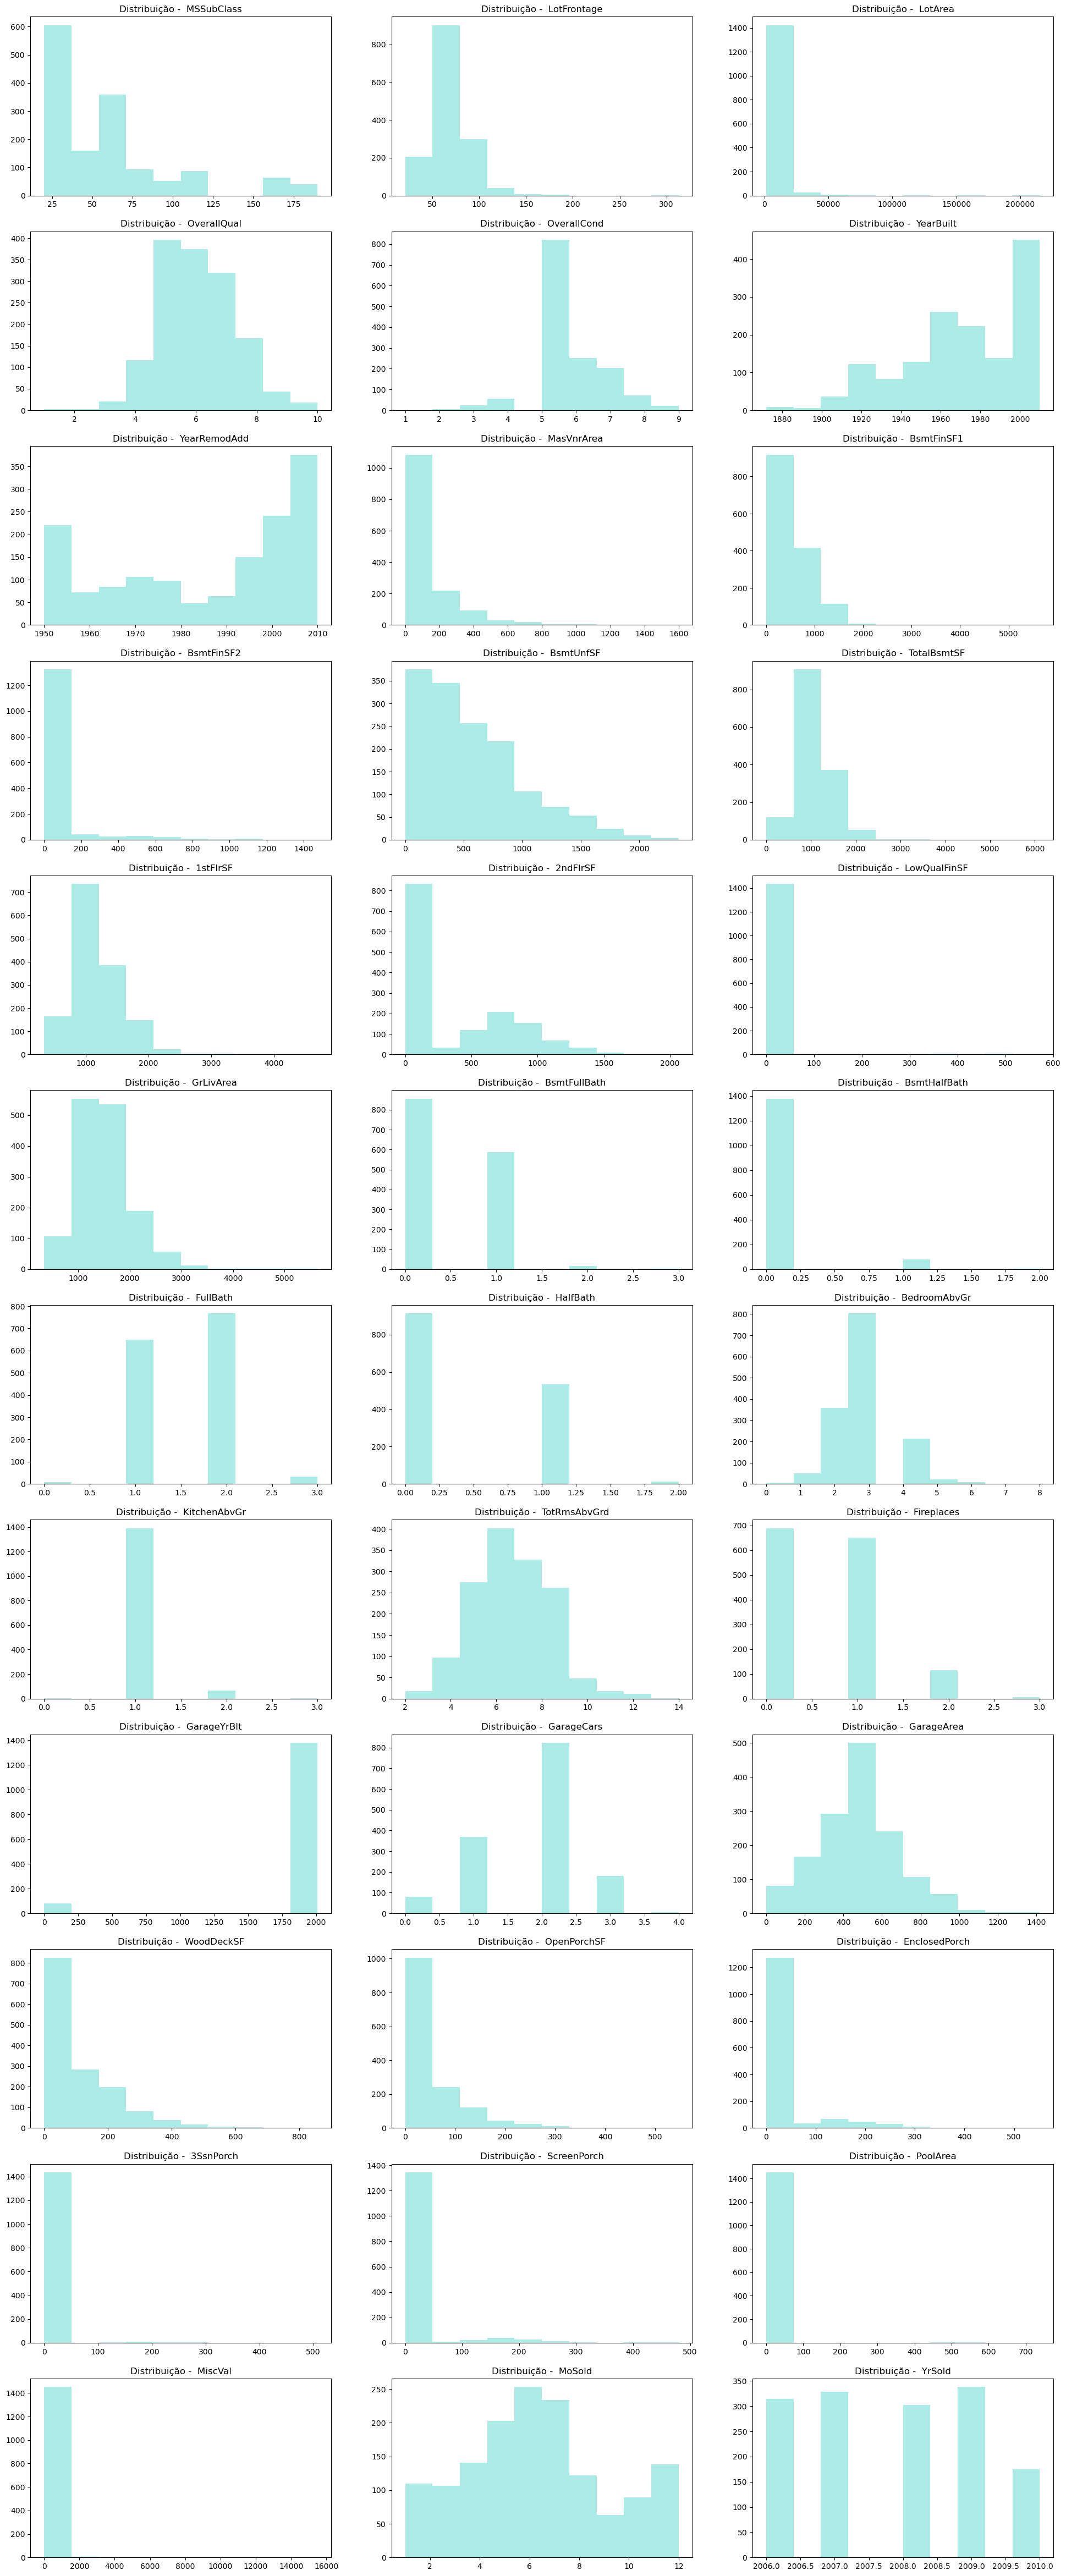

In [18]:
plt.figure(figsize=(24,60))
col_count = 1

for col in columns_number[:36]:
    plt.subplot(12,3,col_count)
    sns.distplot(x=price_house[col], kde=False, bins=10, color = '#2BCDC1')
    plt.title(f'Distribuição -  {col}')
    
    col_count += 1

<h3 style="color: #cca002"><strong>Observações sobre as variáveis numéricas:</strong></h3>

Algumas variáveis númericas apresentam uma distribuição desbalanceadas, isto é, contendo valores com frequências muito diferentes. Isso será um problema na estapa de treinamento do modelo, o modelo pode enviesar porque o padrão dos dados para a classe dominante vai se sobressair em relação aos da classe com menor frequência. 

Varáveis que apresentam uma distribuição desbalanceada:

* A variável **BsmtFinSF2** é a área do porão se houve mais de um porão, sendo mais de 90% dos valores concentrado em 0. 
* A variável **LowQualFinSF** é a quantidade de metros quadrados com acabamento de baixa qualidade, sendo que apresenta uma distibuição quase total concentrada no valor 0
* A variável **BsmtHalfBath** informa a quantidade de banheiro no porão e sua distribuição se concentra no valor 0.
* A variável **KitchenAbvGr** é a classificação das cozinhas na casa, sendo que as classificações diferente de 1 quase não tem frequência relevante perto da classificação 1.
* A variável **EnclosedPorch** representa a área de varanda fechada em metros quadrados, sendo que mais de 90% dos valores concentrado em 0.
* A variável **3SsnPorch** é a área de varanda de três estações e quase 95% dos valores estão concentrado em 0.
* A variável **ScreenPorch** é a área da varanda com tela, sendo que sua concentração em 0 é muito grande em relação aos outros valores.
* A variável **MiscVal** é o valor do recurso diverso sendo quase 95% dos valores concentrados em 0.



Essas variáveis com esses desbalanceamentos serão descartados.

In [19]:
# Descartando as variáveis com desbalanceamento do dataset geral que é o nosso 'price_house' 

price_house.drop(columns = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
                                '3SsnPorch', 'ScreenPorch', 'MiscVal'], inplace=True)

### Análises das Variáveis Categóricas

In [20]:
# Estatística básica das variáveis categóricas

price_house.describe(include=['object']).T

,count,unique,top,freq
MSZoning,1459,5,RL,1150
Street,1459,2,Pave,1453
Alley,1459,3,Without Access,1368
LotShape,1459,4,Reg,924
LandContour,1459,4,Lvl,1310
Utilities,1459,2,AllPub,1458
LotConfig,1459,5,Inside,1051
LandSlope,1459,3,Gtl,1381
Neighborhood,1459,25,NAmes,225
Condition1,1459,9,Norm,1259


In [21]:
# Selecionando as variáveis categóricas

columns_string = price_house.select_dtypes(exclude=['float64', 'int64']).columns

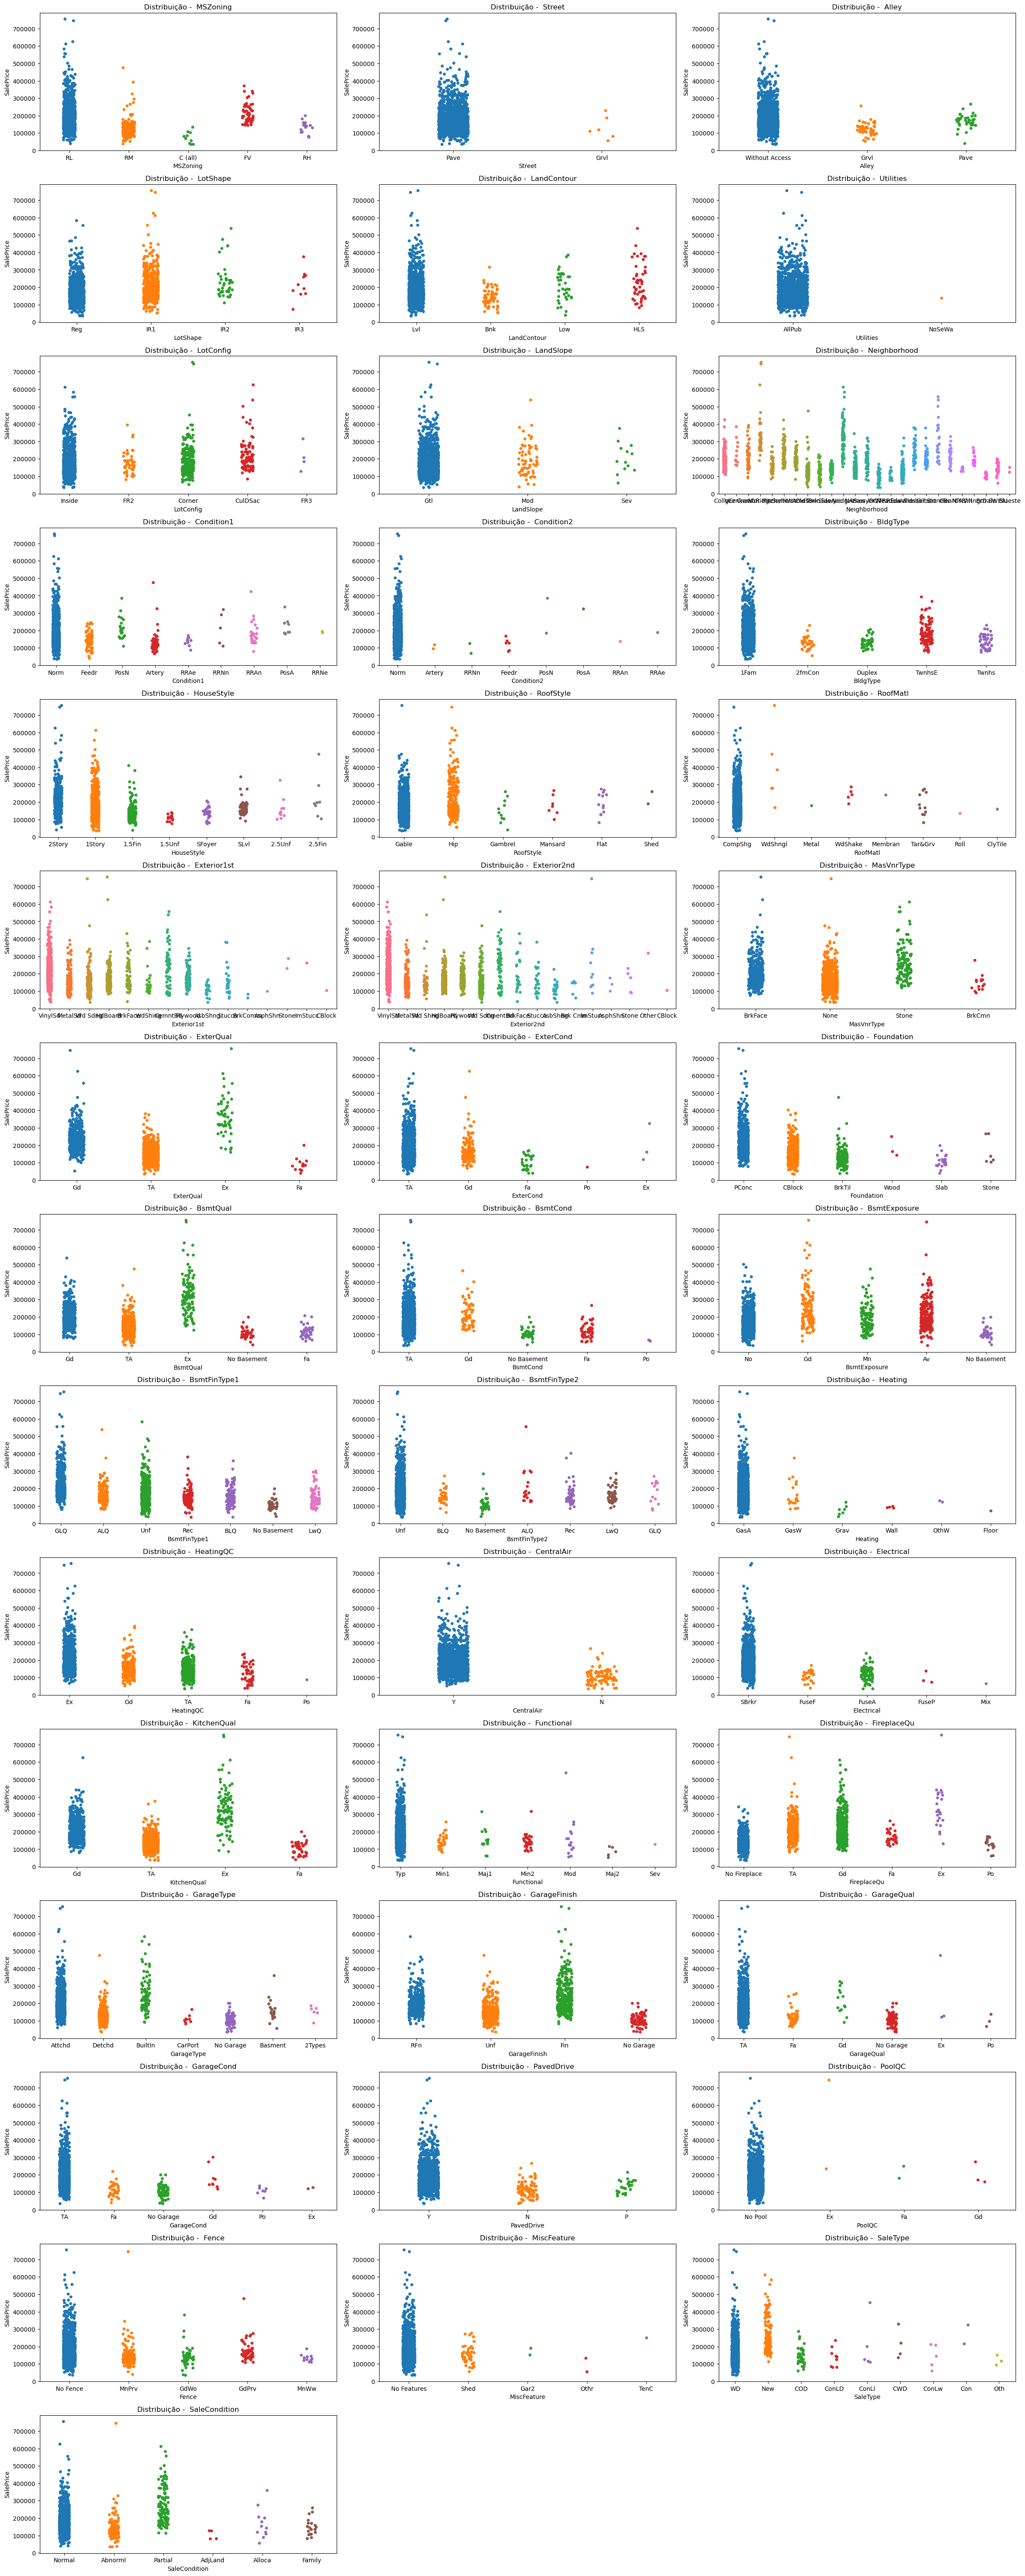

In [22]:
plt.figure(figsize=(24,60))
col_count = 1

for col in columns_string:
    plt.subplot(15,3,col_count)
    plt.tight_layout()
    
    sns.stripplot(data=price_house, x = price_house[col], 
                  y=price_house['SalePrice'], hue = price_house[col], legend=False)
    plt.title(f'Distribuição -  {col}')
    
    col_count += 1

<h3 style="color: #cca002"><strong>Observações sobre as variáveis categóricas:</strong></h3>

Algumas variáveis categóricas também apresentam distribuição desbalanceada, vamos avaliar essas variável uma a uma.

Varáveis que apresentam uma distribuição desbalanceada:

* A variável **Street** é o tipo de acesso à propriedade, pelo gráfico dessa variável percebe que o tipo *Grvl* não tem uma representação significativa comparada com o tipo *Pave*. 
* A variável **Utilities** é o tipo de utilitários disponíveis e essa variável é preenchida com dois valores, sendo um deles aparecer uma vez. 
* A variável **Condition2** informa as condições da casa se houver mais de uma. Existem 7 condições diferentes com frequência muito baixa sendo que quase 95% das casas não tem mais de uma condição.
* A variável **RoofMatl** é o tipo de material de telahado da casa. Sendo que quase todas as casa tem o material de tenahdo padrão, variando muito pouco para outro tipo de telhado.
* Outra variável que tem uma distribuição desbalanceada é a **Heating**, que é o tipo de aquecimento da casa. Variando muito pouco do padrão das casas que é o aquecimento por forno de ar a gás (GasA).

* A informação se a casa tem ou não piscina **PoolQC**, e se tem qual estado está, não está bem distribuindas entre seus valores. Mais 95% das casas não possuem piscina.

* E 90% das casas não possuem outros recurso diverso não coberto em outras categorias, **MiscFeatures**.


Essas variáveis com esses desbalanceamentos serão descartados.

In [23]:
# Descartando as variáveis com desbalanceamento do dataset geral que é o nosso 'price_house' 

price_house.drop(columns = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 
                               'PoolArea', 'MiscFeature'], inplace=True)

<h3 style="color: #cca002"><strong>Observações considerando as observações das variáveis acima:</strong></h3>

Analisando apenas as distribuições das variáveis categóricas e numéricas, algumas variáveis serão descartadas para seguir com as análises. Mas no decorrer do desenvolvimento pode ser feito a remoção de alguma variável se for necessário. 

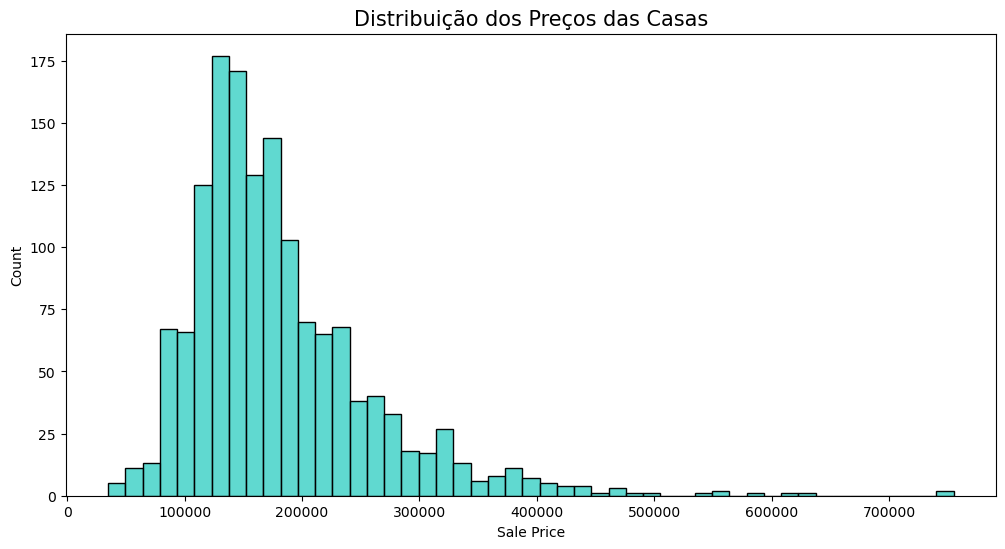

In [24]:
# Histograma da faixa de preço daS casas

plt.figure(figsize=(12,6))
sns.histplot(price_house.SalePrice, color = '#2BCDC1')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribuição dos Preços das Casas', size = 15)
plt.show()

<h3 style='color : #cca002'> Observações </h3>

A concentração dos preços se encontra na faixa de 1.000.000 entre 4.000.000 e algumas casas passando de 7.000.000. Agora, vamos analisar a relação do preço da casa com a sua localidade.

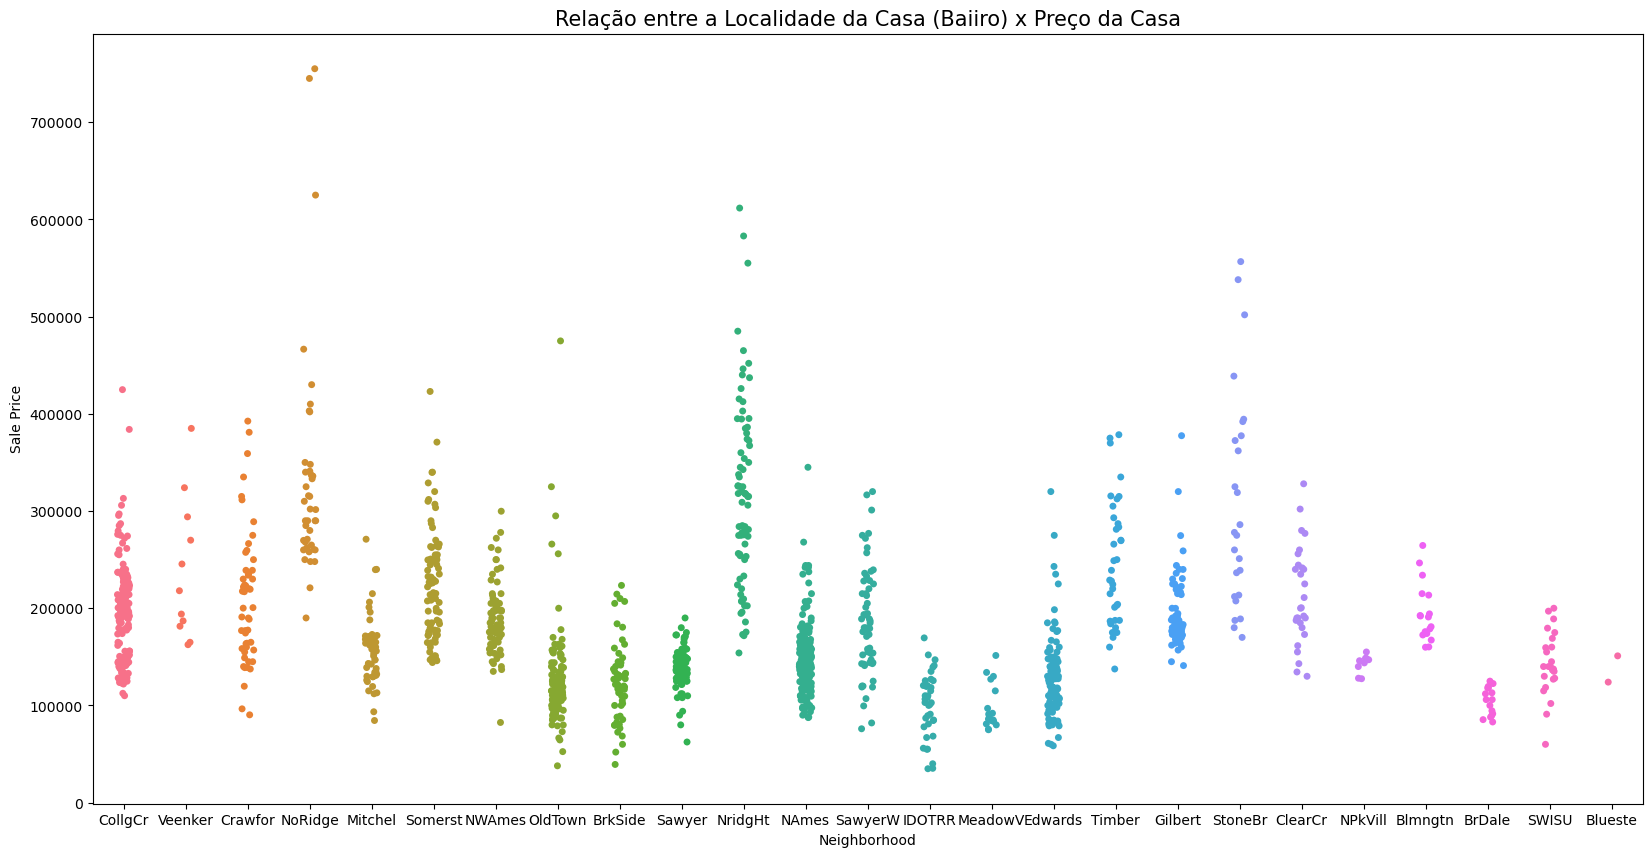

In [25]:
plt.figure(figsize=(20,10))
sns.stripplot(data = price_house, y = 'SalePrice', x = 'Neighborhood', hue = 'Neighborhood', legend = False)
plt.title('Relação entre a Localidade da Casa (Baiiro) x Preço da Casa', size = 15)
plt.ylabel('Sale Price')
plt.show()

<h3 style = 'color : #cca002'> Obsersevações</h3>

Ao analisar a varição de preços com o a a localidade, neste caso com o bairro, percebemos que o bairro *NoRidge* é um dos mais caro, seguido pelo bairro *NridgHt* e *StoneBar*. E o bairro que tem os preços das casas mais baixos é *IDOTRR*, seguido por *OldTown* e *BrkSide*. 

In [26]:
# Criando uma coluna com descrição das avaliações para melhor representação no gráfico

desc_cond = {10:'Very Excellent',
             9: 'Excellent',
             8: 'Very Good',
             7: 'Good',
             6: 'Above Average',
             5: 'Average',
             4: 'Below Average',
             3: 'Fair',
             2: 'Poor',
             1: 'Very Poor'}

price_house['DescCond'] = price_house['OverallQual'].replace(desc_cond)

In [27]:
cats_order = ['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 
              'Above Average', 'Good', 'Very Good','Excellent', 'Very Excellent']

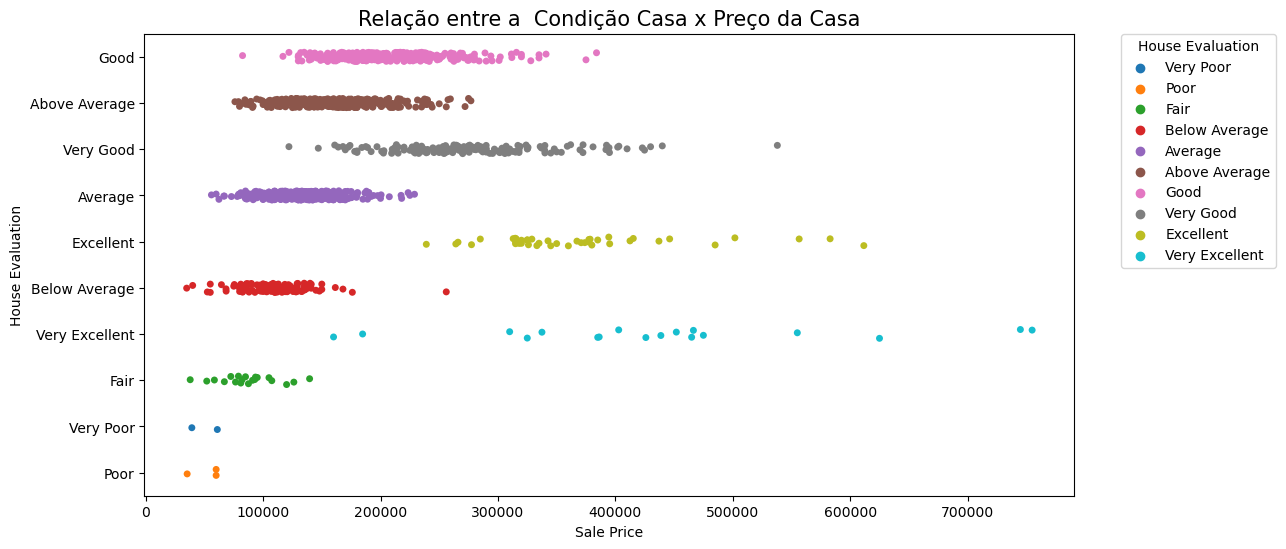

In [28]:
plt.figure(figsize=(12,6))
sns.stripplot(data=price_house, x='SalePrice', y='DescCond',hue = 'DescCond', hue_order=cats_order)

plt.title('Relação entre a  Condição Casa x Preço da Casa', size = 15)
plt.xlabel('Sale Price')
plt.ylabel('House Evaluation')

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.,
          title ='House Evaluation')
plt.show()

In [29]:
# Descartando a variável criada

del price_house['DescCond']

<h3 style = "color : #cca002">Observações </h3>

A variável *OverallQual* descreve a qualidade geral do material e o acabamento da casa em uma escala de 1 a 10. Percebemos que tem impacto a avaliação de qualidade em relação aos valores das casas, os valores começam a serem mais altos quando a casa está com uma classifição maior que 3 (*Fair*). A maioria das casas estão acima da classificação 4 (*Below Average*) e há uma boa concentração das casas na classificação 5 (*Avarege*).

Text(0.5, 0, 'Ano de Construção')

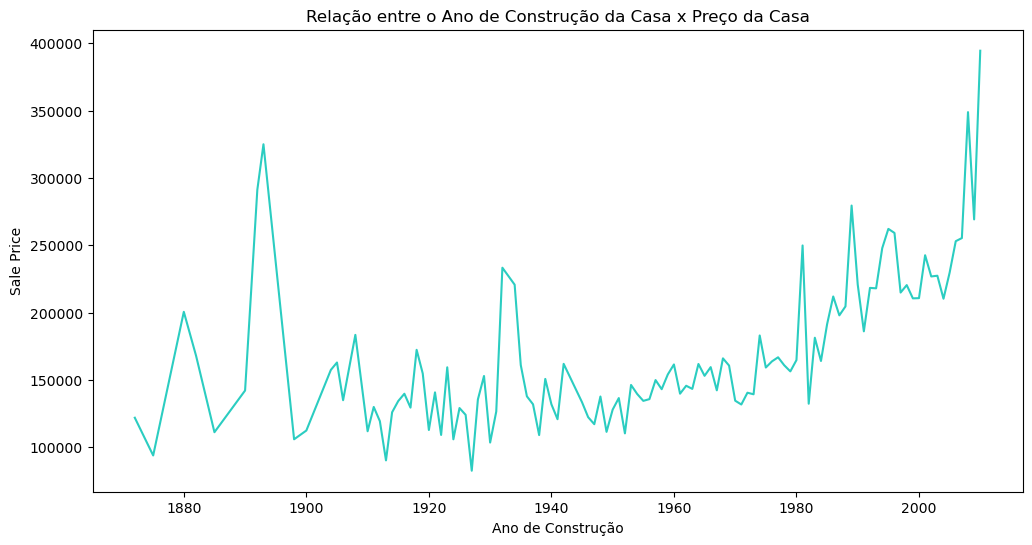

In [30]:
# Anos das casa x preços

plt.figure(figsize=(12,6))
sns.lineplot(y = price_house.SalePrice, x = price_house.YearBuilt, ci = None, color = '#2BCDC1')
plt.title('Relação entre o Ano de Construção da Casa x Preço da Casa')
plt.ylabel('Sale Price')
plt.xlabel('Ano de Construção')

#### Agora vamos analisar a correlação entre as variáveis 

In [31]:
price_house.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.35,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.14,-0.24,-0.25,0.31,0.07,0.00,0.13,0.18,-0.02,0.04,-0.05,-0.08,-0.04,-0.10,-0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.35,1.00,0.28,0.24,-0.06,0.11,0.09,0.17,0.20,0.14,0.36,0.40,0.07,0.36,0.08,0.18,0.04,0.23,0.32,0.21,0.09,0.26,0.32,0.06,0.13,0.01,0.00,0.33
LotArea,-0.14,0.28,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,-0.00,0.26,0.30,0.05,0.26,0.16,0.13,0.01,0.12,0.19,0.27,0.07,0.15,0.18,0.17,0.08,0.00,-0.01,0.26
OverallQual,0.03,0.24,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,0.31,0.54,0.48,0.30,0.59,0.11,0.55,0.27,0.10,0.43,0.40,0.29,0.60,0.56,0.24,0.31,0.07,-0.03,0.79
OverallCond,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,-0.14,-0.17,-0.14,0.03,-0.08,-0.06,-0.19,-0.06,0.01,-0.06,-0.02,-0.01,-0.19,-0.15,-0.00,-0.03,-0.00,0.04,-0.08
YearBuilt,0.03,0.11,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,0.15,0.39,0.28,0.01,0.20,0.19,0.47,0.24,-0.07,0.10,0.15,0.27,0.54,0.48,0.22,0.19,0.01,-0.01,0.52
YearRemodAdd,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,0.18,0.29,0.24,0.14,0.29,0.12,0.44,0.18,-0.04,0.19,0.11,0.15,0.42,0.37,0.21,0.23,0.02,0.04,0.51
MasVnrArea,0.02,0.17,0.10,0.41,-0.13,0.31,0.18,1.00,0.26,0.11,0.36,0.34,0.17,0.39,0.08,0.27,0.20,0.10,0.28,0.25,0.13,0.36,0.37,0.16,0.12,-0.01,-0.01,0.47
BsmtFinSF1,-0.07,0.20,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.50,0.52,0.45,-0.14,0.21,0.65,0.06,0.01,-0.11,0.04,0.26,0.12,0.22,0.30,0.20,0.11,-0.02,0.01,0.39
BsmtUnfSF,-0.14,0.14,-0.00,0.31,-0.14,0.15,0.18,0.11,-0.50,1.00,0.42,0.32,0.00,0.24,-0.42,0.29,-0.04,0.17,0.25,0.05,0.04,0.21,0.18,-0.01,0.13,0.03,-0.04,0.21


<h3 style = "color : #cca002">Observações </h3>

As cores mais intensas na matriz acima indica uma correlação muito forte, sendo essa correlação positiva ou negativa, e as cores menos intensas indica uma correlação fraca. As seguintes variáveis têm uma correlação muito fraca, sendo um avlor inferior que 0,1(negativo ou positivo):

* MSSubClass	
* OverallCond
* MoSold
* YrSold

Essas variáveis serão descartadas.

In [32]:
# Descartando as variáveis com desbalanceamento do dataset geral que é o nosso 'price_house' 

price_house.drop(columns = ['MSSubClass', 'OverallCond', 'MoSold', 'YrSold'], inplace=True)

<h3 style="color: #526910"><strong>Conclusão da Sessão</strong></h3>

Com base na Análise Exploratória foi analisado:

* distribuição dos valores das variáveis numéricas e categóricas
* análise de distibuição de valores dos preços das casas
* relação do preço da casa com o ano de contrução e algumas características que as casas possueam
* a matriz de correlação para entender como estão as correlações de todas as variáveis com a variável *SalePrice*.

Com esta análise foi reduzido o dataset, deixando as variáveis mais relevantes para as próximas etapas.

<h1 style="text-align:center;" ><a id="ses6">Normalização dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é transfomar os dados de uma forma que eles tenham distribuições semelhantes. 

In [33]:
# lista das colunas a serem normalizadas e removendo algumas colunas que não serão normalizadas,
# pois algumas são encode já e a variável SalePrice

list_columns = price_house.select_dtypes(exclude='object'
                                            ).drop(
    columns=['OverallQual', 'SalePrice']).columns.to_list()

In [34]:
price_house[list_columns] = normalize(price_house[list_columns])

<h1 style="text-align:center;" ><a id="ses7">Encoding dos Dados</a></h1>

[VOLTAR](#sumario)

<h3 style="color: #1f9d76">Notebook Description</h3>

O objetivo dessa etapa é transfomar os dados do tipo categóricos em número. Os modelos de Machine Learning exigem que todas as variáveis de entrada e saída sejam numéricas, por isso dever-se codificar os dados categóricos antes de poder ajustar e avaliar um modelo.

In [35]:
list_columns_cat = price_house.select_dtypes(include='object').columns

In [36]:
# Instanciando as funções encoder para as variáveis categóricas

encoder = {}

for col in list_columns_cat:
    encoder[col] = LabelEncoder()
    price_house[col] = encoder[col].fit_transform(price_house[col])

In [37]:
# Código para fazer o inverso do LabelEncoder() para conferir a codificação

# for col in list_columns_cat:
#     price_house[col] = encoder[col].inverse_transform(price_house[col])

<h3 style="color: #526910"><strong>Conclusão da Sessão</strong></h3>

Com base nas duas útimas sessões, [Normalização dos Dados](#ses6) e [Encoding dos Dados](#ses7), foi realizado:

* O processo de **Normalização** é para deixar os dados numéricos com escala semelhante;
* O processo de **Encoding** é para transformar os dados categóricos em números.

Esses processos são importante para que o modelo treinado tenha um bom desempenho e generalize bem. 

<h1 style="text-align:center;" ><a id="ses8">Modelo LBGM</a></h1>

[VOLTAR](#sumario)

In [38]:
# Separando os dados em treino e teste

X = price_house.drop(columns = ['SalePrice'])
y = price_house['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1021, 59) (438, 59) (1021,) (438,)


In [40]:
# Definindos os hiperparâmetros

params = {'learning_rate': 0.3,
         'max_depth': 25,
         'num_leaves': 15,
         'feature_fraction': 0.8,
         'subsample': 0.3,
         'n_estimators': 200,
         'boosting': 'gbdt',
         'objective': 'regression',
         'metric': 'RMSE'}

In [41]:
# Definindo o modelo

model_lgbm_regressor = lgbm.LGBMRegressor(**params)
model_lgbm_regressor

LGBMRegressor(boosting='gbdt', feature_fraction=0.8, learning_rate=0.3,
              max_depth=25, metric='RMSE', n_estimators=200, num_leaves=15,
              objective='regression', subsample=0.3)

In [42]:
# Treinamento do modelo

model_lgbm_regressor.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


LGBMRegressor(boosting='gbdt', feature_fraction=0.8, learning_rate=0.3,
              max_depth=25, metric='RMSE', n_estimators=200, num_leaves=15,
              objective='regression', subsample=0.3)

In [43]:
# Fazendo a predição

value_price_predict = model_lgbm_regressor.predict(X_test)

predict_price_house = pd.DataFrame({'Id': y_test.index, 'Price_Predict': value_price_predict})
predict_price_house.head()

,Id,Price_Predict
0,1322.0,81480.323107
1,837.0,128154.753497
2,414.0,94309.275072
3,523.0,137229.953297
4,1036.0,103909.330694


In [44]:
# Avaliando o desempenho do modelo 

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test, value_price_predict)
mse = mean_squared_error(y_test, value_price_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, value_price_predict)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coeficiente de determinação: {r2:.2f}')

Mean absolute error: 19041.63
Mean squared error: 746058663.41
Root mean squared error: 27314.07
Coeficiente de determinação: 0.88


As métricas de avaliação utilizadas para avaliar o modelo LGBM, foram:

* **MAE** (Erro Absoluto médio) representa a diferença entre os valores original e previsto extraídos pela média da diferença absoluta sobre o conjunto de dados.

* **MSE** (Mean Squared Error) representa a diferença entre os valores original e previsto extraídos por quadrado da diferença média sobre o conjunto de dados.

* **RMSE** (Root Mean Squared Error) é a taxa de erro pela raiz quadrada do MSE.

* **R-quadrado** (Coeficiente de determinação) representa o coeficiente de quão bem os valores se ajustam em comparação com os valores originais. O valor de 0 a 1 interpretado como porcentagens. Quanto maior o valor, melhor é o modelo.

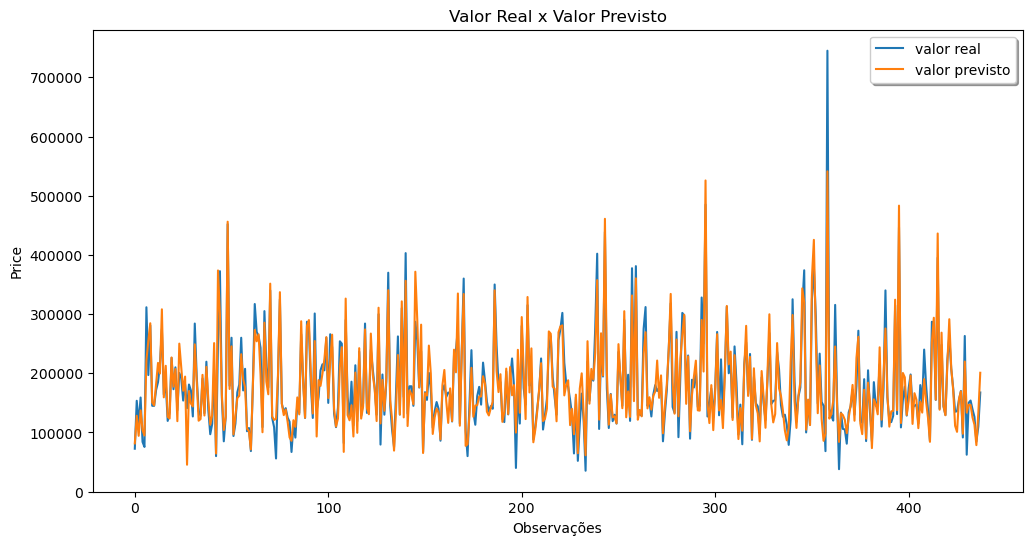

In [45]:
# Visualização dos valores previstos com o real

plt.figure(figsize=(12, 6))

x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="valor real")
plt.plot(x_ax, value_price_predict, label="valor previsto")

plt.title("Valor Real x Valor Previsto")
plt.xlabel('Observações')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()  

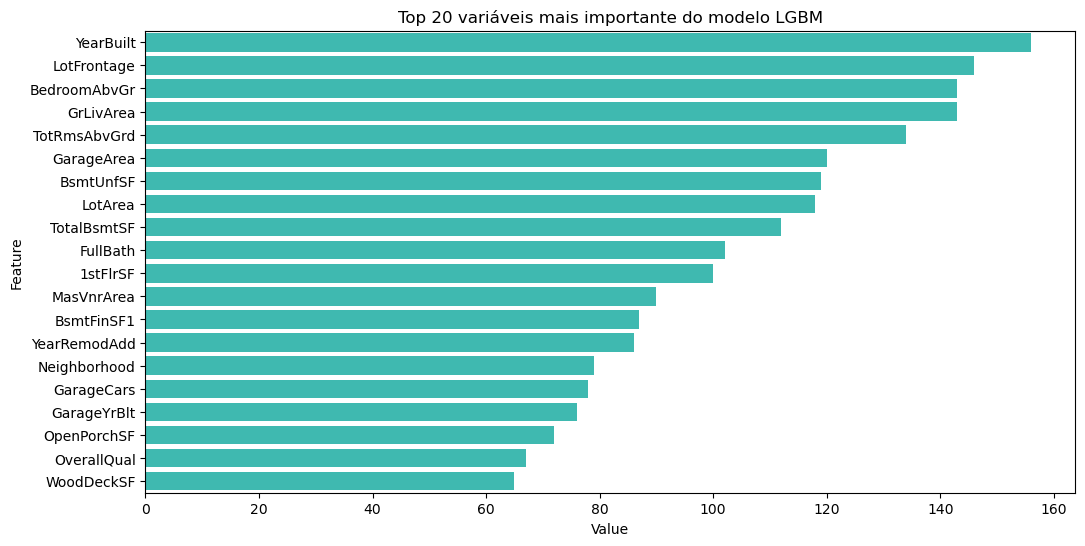

In [46]:
# Visualização das variáveis mais importantes

feature_imp = pd.DataFrame({'Value':model_lgbm_regressor.feature_importances_,'Feature':X_train.columns})

plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:20], color = '#2BCDC1')
plt.title('Top 20 variáveis mais importante do modelo LGBM')
plt.show()

<h2 style="color: #1f9d76">Conclusão</h2>

[VOLTAR](#sumario)

Neste projeto, exploramos uma abordagem LGBM para prever o preço de venda de casas no conjunto de dados [Preços de Casas -Técnicas de Regressão Avançada]('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data'). 

Começamos pela etapas de preparação dos dados para modelagem, em seguida, criamos um modelo LGBM ajustando os hiperparâmetros para prever o preço de venda da casa.